# scikit-learn을 이용한 앙상블 메소드

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

cm2 = ListedColormap(['C1', 'C2'])
cm3 = ListedColormap(['C1', 'C2', 'C3'])

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier

# 위 세가지 학습기중 2개가 O, 1개가 X라고 결과가 나오면 O라고 결론 짓는것. -> 앙상블

## 배깅Bagging(Bootstrap Aggregating)

### 부트스트랩

- 데이터셋으로 부터 샘플을 복원 추출하여 새로운 데이터 셋을 만들어 냄

- 복원추출은 추출한 것을 다시 넣고 뽑기를 반복하는 방법. 그래서 중복되어 뽑히게 됨

- 이렇게 복원추출하면 전체 데이터의 약 64%정도가 샘플링 됨 (여러번 뽑히는 샘플이 있는 반면 한번도 안뽑히는 샘플이 있기 때문)


In [ ]:
# 데이터 복원추출 시뮬레이션[+]
X = np.random.rand(100)

X_boot = np.random.choice(X, X.shape[0], replace=True)
print(len(X_boot))
print(len(set(X_boot)))

100
64


- 이렇게 복원 추출된 조금씩 다른 다양한 데이터 셋에 대해서 개별 예측기를 학습시키고 위에서 알아본 것처럼 예측의 평균 또는 다수결 투표로 최종 예측을 하게 됨

- 개별 예측기는 아무 예측기나 가능하나 결정트리 많이 사용

### 데이터 생성

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

### 데이터 확인

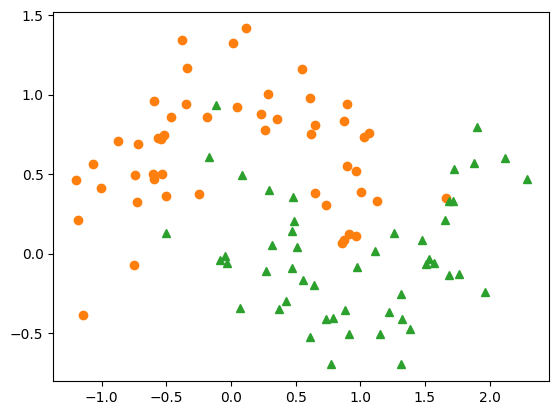

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X[y==0][:, 0], X[y==0][:, 1], 'o', color='C1')
ax.plot(X[y==1][:, 0], X[y==1][:, 1], '^', color='C2')

plt.show()

### 학습

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 분류기 개수
N = 30

In [ ]:
# 배깅 직접 코딩 [+]
np.random.seed(1)

# 데이터를 직접 추출하지 않고 데이터의 인덱스를 만들고
# 인덱스를 추출
idx = np.arange(X.shape[0]) # 0 ~ N-1
ests = []

for i in range(N):
    # idx에서 복원추출한 새로운 인덱스로
    # 부트스르래핑된 데이터 셋 만들기[*]
    idx_boot = np.random.choice(idx, X.shape[0], replace=True)
    X_boot = X[idx_boot]
    y_boot = y[idx_boot]

    # max_depth=5로 트리분류기를 만들어 ests에 추가하고 피팅하기
    ests.append(DecisionTreeClassifier(max_depth=5))
    ests[-1].fit(X_boot, y_boot)

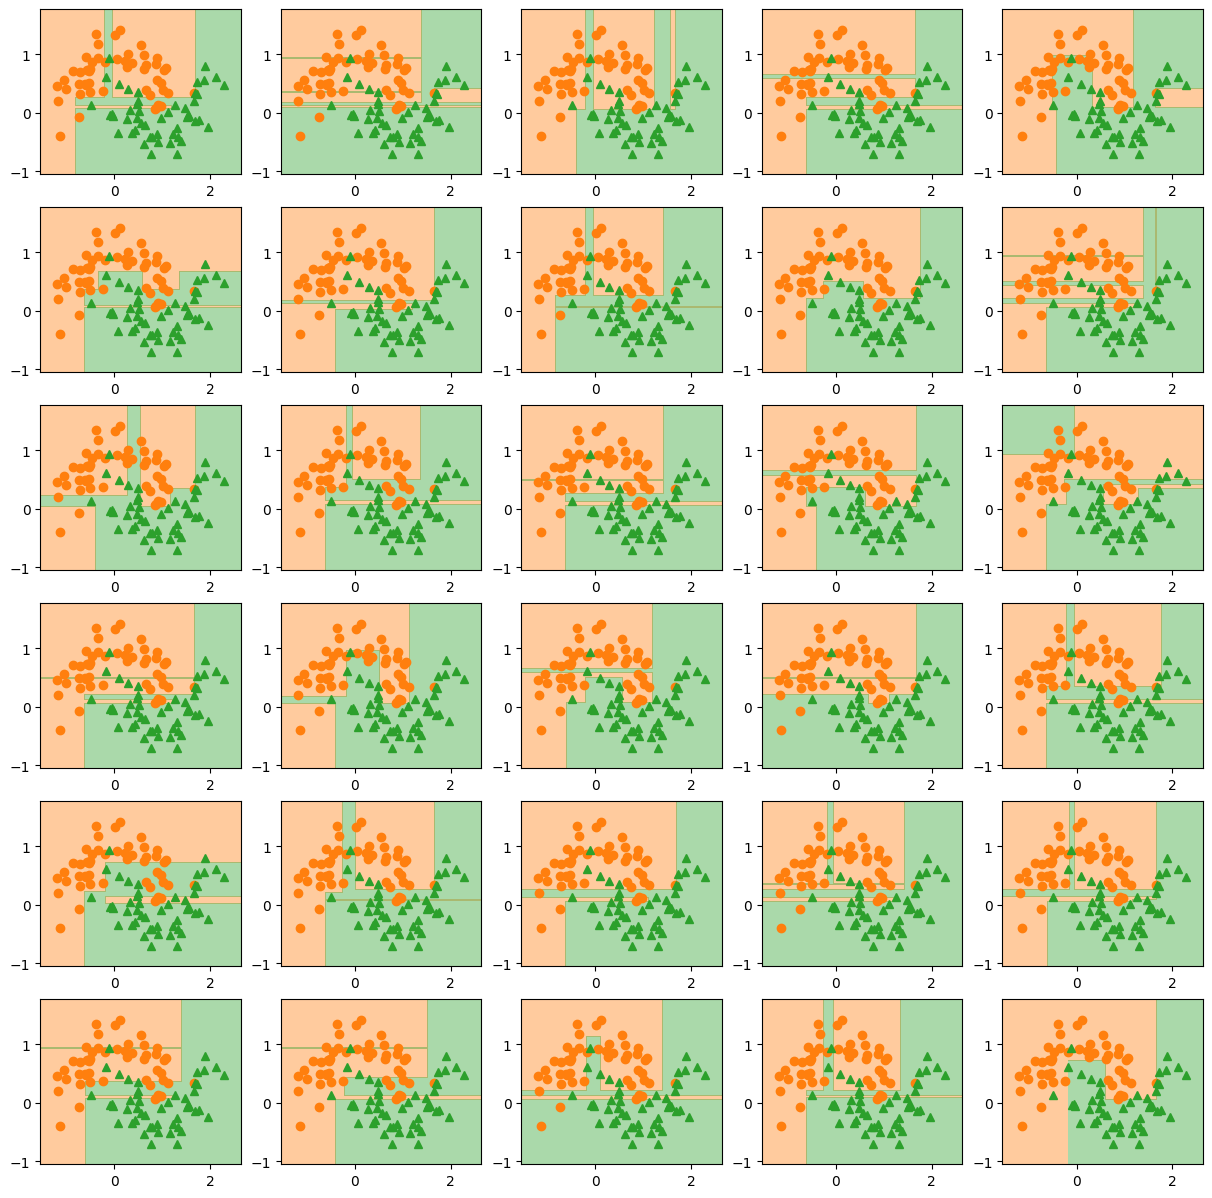

In [ ]:
# 그림으로 확인

eps = X.std() / 2. # 큰 의미는 없음 : 작은 수를 만들기 위함.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
xx = np.linspace(x_min, x_max, 1000)
yy = np.linspace(y_min, y_max, 1000)
X1, X2 = np.meshgrid(xx, yy)
X_grid = np.c_[X1.ravel(), X2.ravel()]

# 30개 그림 그리기
cols = 5
fig, ax = plt.subplots(figsize=(15,15), nrows=6, ncols=cols)

for k in range(N):
    i = k // cols
    j = k % cols

    Z = ests[k].predict(X_grid)
    Z = Z.reshape(X1.shape)

    ax[i,j].plot(X[y==0][:, 0], X[y==0][:, 1], 'o', color='C1')
    ax[i,j].plot(X[y==1][:, 0], X[y==1][:, 1], '^', color='C2')
    ax[i,j].contourf(X1, X2, Z, alpha=.4, cmap=cm2, levels=[0, .5, 1])

    ax[i,j].set_xlim(x_min, x_max)
    ax[i,j].set_ylim(y_min, y_max)

plt.show()

- 각 분류의 결정경계가 차이가 있음

In [ ]:
ests

[DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=5),
 DecisionTre

In [ ]:
# 각 개별 예측기의 결과를 모으기 [+]
# X_grid: (1000000, 2)
# pred_i: (1000000, 30)

pred_i = np.r_[ [ests[i].predict(X_grid) for i in range(N)] ].T
pred_i.shape

(1000000, 30)

In [ ]:
np.bincount([1,1,0,0,0,1,0])

array([4, 3])

In [ ]:
print("0번 샘플에 대한 30개 예측",pred_i[0])
print("0과 1로 묶어 세면", np.bincount(pred_i[0]))
print("최종 판단은", np.argmax(np.bincount(pred_i[0])))
print("\n")
print(f"{1000000-1}번 샘플에 대한 30개 예측",pred_i[1000000-1])
print("0과 1로 묶어 세면", np.bincount(pred_i[1000000-1]))
print("최종 판단은", np.argmax(np.bincount(pred_i[1000000-1])))

0번 샘플에 대한 30개 예측 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0]
0과 1로 묶어 세면 [26  4]
최종 판단은 0


999999번 샘플에 대한 30개 예측 [1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
0과 1로 묶어 세면 [ 3 27]
최종 판단은 1


In [ ]:
# 각 개별 예측기의 결과를 정리하기(다수결투표) [*]
pred_ensemble = np.array(
    [
        np.argmax( np.bincount(pred_i[i]) )
                            for i in range(pred_i.shape[0])
    ]
) # 모든 샘플에 대해서

In [ ]:
pred_ensemble.shape

(1000000,)

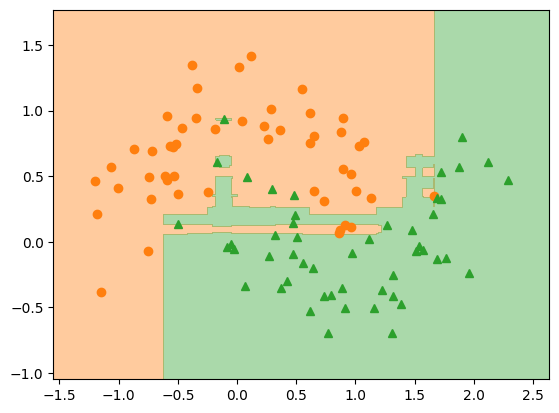

In [ ]:
# 그림으로 확인
eps = X.std() / 2.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
xx = np.linspace(x_min, x_max, 1000)
yy = np.linspace(y_min, y_max, 1000)
X1, X2 = np.meshgrid(xx, yy)
X_grid = np.c_[X1.ravel(), X2.ravel()]

Z = pred_ensemble
Z = Z.reshape(X1.shape)

fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X[y==0][:, 0], X[y==0][:, 1], 'o', color='C1')
ax.plot(X[y==1][:, 0], X[y==1][:, 1], '^', color='C2')
ax.contourf(X1, X2, Z, alpha=.4, cmap=cm2, levels=[0, .5, 1])

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.show()

#### sklearn 이용

In [ ]:
# 모델 임포트 [+]
from sklearn.ensemble import BaggingClassifier

In [ ]:
# 모델 생성과 학습 [+]
bagging_tree = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=N,
    random_state=1
).fit(X, y)

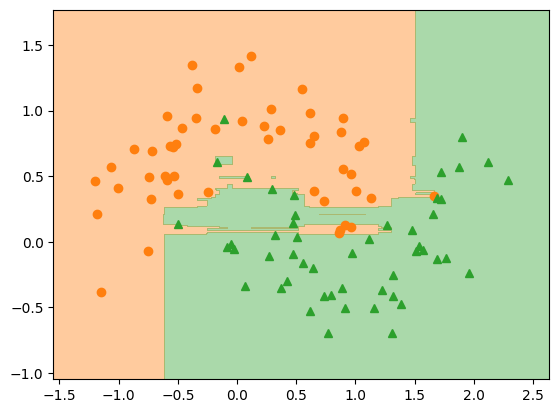

In [ ]:
# 그림으로 확인
eps = X.std() / 2.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
xx = np.linspace(x_min, x_max, 1000)
yy = np.linspace(y_min, y_max, 1000)
X1, X2 = np.meshgrid(xx, yy)
X_grid = np.c_[X1.ravel(), X2.ravel()]

Z = bagging_tree.predict(X_grid)
Z = Z.reshape(X1.shape)

fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X[y==0][:, 0], X[y==0][:, 1], 'o', color='C1')
ax.plot(X[y==1][:, 0], X[y==1][:, 1], '^', color='C2')
ax.contourf(X1, X2, Z, alpha=.4, cmap=cm2, levels=[0, .5, 1])

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.show()

- 직접 만든 bagging과 비슷하게 나옴을 확인

---

## 랜덤 포레스트Random Forest

- 결정트리는 과대적합이 쉽게 되는 경향있음

- 각기 다른 방식으로 과대적합되는 결정트리를 여러개 만들어서 각 결과를 평균하여 최종 결과 생성

- 트리를 여러개 만들 때 서로 특성이 다른 트리를 만들어야 하므로 무작위성을 주입
    - 데이터 셋에서 샘플을 매번 무작위로 선택(배깅) + 분할 특성을 무작위로 선택
    - 분할특성을 무작위로 선택하는 것? : 내가 선택을 할 특성이 100개라면 30개를 무작위로 선택 후 가장 좋은 특성을 선정

- 즉 각 트리를 더 독립적으로 만들기 위해 배깅 방법에 분할 특성까지 무작위로 선택해서 나누는 방식

- `max_features`속성으로 무작위 선택에서 고려할 특성 수를 지정(ex : 100개중 몇개를 무작위로 선택 할 것이냐를 선택)
    - `auto`: max_features=sqrt(n_features).
    - `sqrt`: max_features=sqrt(n_features) (same as “auto”).
    - `log2`: max_features=log2(n_features).
    - `None`: max_features=n_features.

- 위 항목처럼 전체 특성에서 무작위로 `max_features`에 지정된 개수만큼 고른 후 그중에 가장 좋은 특성을 탐색한다.

### 장단점

- 매개변수를 많이 튜닝하지 않아도 기본적으로 잘 동작

- 트리기반 알고리즘이므로 데이터의 스케일링 필요없음

- 각 개별 트리가 독립적으로 학습되므로 병렬화 시켜 학습속도 높일 수 있음

- 예측시 모든 트리에 대한 예측값을 계산해야 하므로 예측 속도가 선형 모델에 비해 느리고 메모리도 많이 소모

### 학습

In [ ]:
# 모델 임포트[+]
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 학습 하기[+]
N = 5 # 예측기 수

forest = RandomForestClassifier(n_estimators=N, random_state=2)
forest.fit(X, y)

RandomForestClassifier(n_estimators=5, random_state=2)

- `estimators_`속성으로 개별 트리 그리기

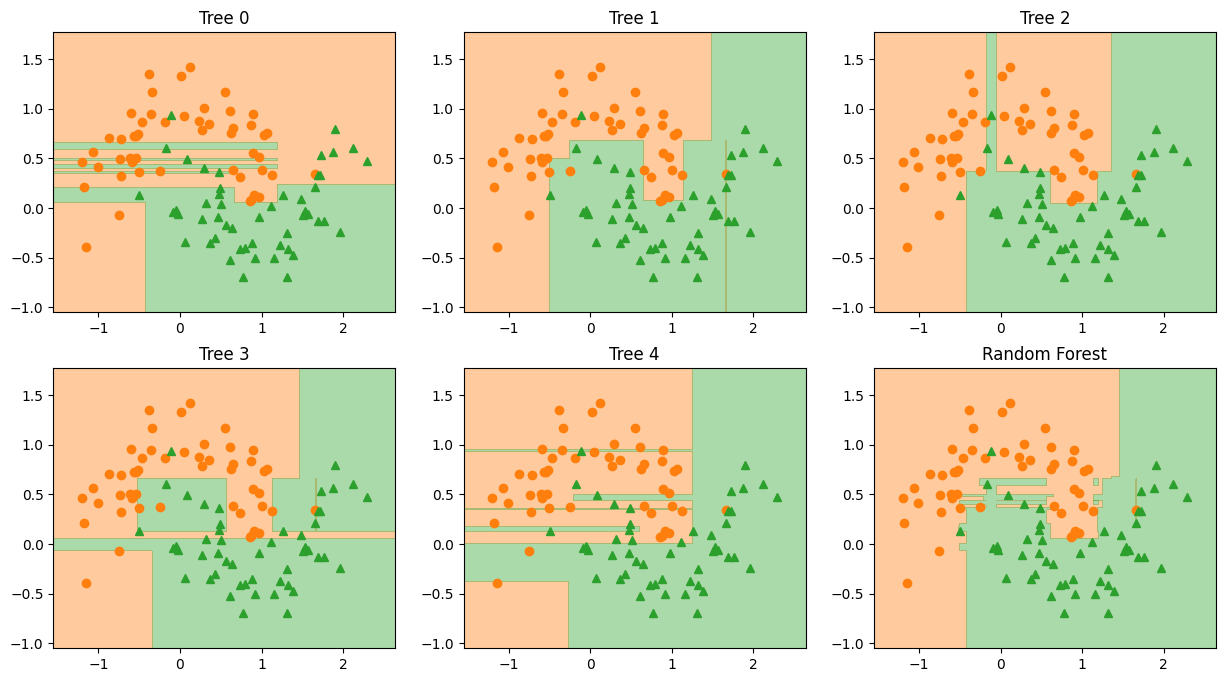

In [ ]:
# 그림으로 확인
eps = X.std() / 2.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
xx = np.linspace(x_min, x_max, 1000)
yy = np.linspace(y_min, y_max, 1000)
X1, X2 = np.meshgrid(xx, yy)
X_grid = np.c_[X1.ravel(), X2.ravel()]

cols=3
fig, ax = plt.subplots(figsize=(15,8), nrows=2, ncols=cols)

for n in range(N+1):
    i = n // cols
    j = n % cols

    ###############################################
    # [+]
    # estimators_로 그림그리기
    if n < N:
        Z = forest.estimators_[n].predict(X_grid)
        ax[i,j].set_title(f"Tree {n}")
    else:
        Z = forest.predict(X_grid)
        ax[i,j].set_title(f"Random Forest")
    ###############################################

    Z = Z.reshape(X1.shape)

    ax[i,j].plot(X[y==0][:, 0], X[y==0][:, 1], 'o', color='C1')
    ax[i,j].plot(X[y==1][:, 0], X[y==1][:, 1], '^', color='C2')
    ax[i,j].contourf(X1, X2, Z, alpha=.4, cmap=cm2, levels=[0, .5, 1])

    ax[i,j].set_xlim(x_min, x_max)
    ax[i,j].set_ylim(y_min, y_max)

plt.show()

- 5개의 Tree를 취합 -> random forest 생성

#### 직접 예측 만들기

$$
\hat{k} = \underset{k}{\text{argmax}} \frac{1}{N} \sum_i^N P_i(C_k | \mathbf{x})
$$

- 위 식에서 $i$는 개별 예측기의 인덱스

- $P_i(C_k | \mathbf{x})$는 $i$번째 예측기가 샘플 $\mathbf{x}$에 대해 $k$번째 클래스라고 예측한 확률

- 아래 셀을 단계적으로 완성하면서 `Z`에 `X_grid` `(1000000, 2)`인 예측 결과를 만들어 보기

In [ ]:
# 모든 테스트 포인트에서 예측 확률을 구한다.[*]
# 예측대상: X_grid
# 예측기 forest.estimators_ 에 5개가 들어있음
# 위 식처럼 하기 위해 predict_proba()를 이용해야 함.
all_pred_proba = np.array([ forest.estimators_[i].predict_proba(X_grid)
                                for i in range(N) ])  # (5, 1M, 2) -> 3차원 행렬
                                                  # 5개의 예측기, 1M, 2개 클래스

# all_pred_proba에는 1M 포인트에 대한 5개 예측기의 예측 확률이 들어있음
# 5개 예측기의 예측 확률을 모두 평균낸다.
all_pred_proba_mean = all_pred_proba.mean(axis=0)  # 0번축(5) 방향 평균 (1M, 2)

# 1M에 대한 예측기에 대한 확률 평균들중 0자리가 큰지 1자리가 큰지 argmax를 이용해서 판단
Z = all_pred_proba_mean.argmax(axis=1) # (1M,)


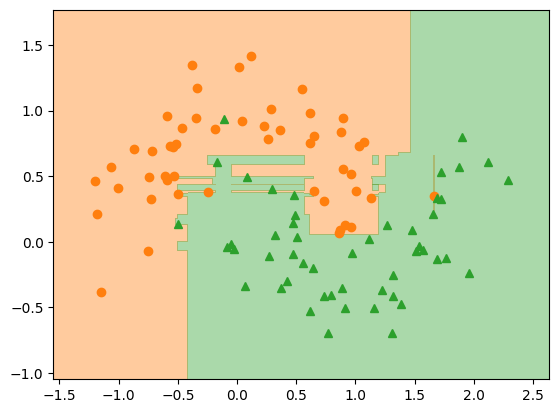

In [ ]:
# 그림으로 확인
eps = X.std() / 2.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
xx = np.linspace(x_min, x_max, 1000)
yy = np.linspace(y_min, y_max, 1000)
X1, X2 = np.meshgrid(xx, yy)
X_grid = np.c_[X1.ravel(), X2.ravel()]

Z = Z.reshape(X1.shape)

fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X[y==0][:, 0], X[y==0][:, 1], 'o', color='C1')
ax.plot(X[y==1][:, 0], X[y==1][:, 1], '^', color='C2')
ax.contourf(X1, X2, Z, alpha=.4, cmap=cm2, levels=[0, .5, 1])

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.show()

- 랜덤 포레스트 결과와 일치하는 것을 확인

## 그래디언트 부스트Gradient Boost
- https://metamath1.github.io/blog/posts/gradientboost/gradient_boosting.html

-  순차적으로 예측기를 만들어 나가되 앞 예측기가 틀린 오차를 학습데이터로 뒤 예측기를 학습시키는 방식

- $m$번째 예측기 $F_m(x_i)$가 있을 때

- 손실 함수의 데이터에 대한 합을 다음처럼 정의, 여기서 $n$은 샘플 개수

$$
\sum_{i=1}^n L(y_i, F_m(x_i))
$$

- (1) 최초 예측기 $F_0(x)$를 다음을 만족하는 상수 $\gamma$로 설정

$$
F_0(x) = \underset{\gamma}{\text{argmin}} \sum_{i=1}^n L(y_i, \gamma)
$$

- (2) $m$번째 예측기가 $m-1$번째 보다 좋으려면 $F_m(x)$는 $F_{m-1}(x)$를 다음처럼 수정해야 한다.




$$
F_m(x) = F_{m-1}(x) + \underset{h_m \in \mathcal{H}}{\text{argmin}} \left[ \sum_{i=1}^n L\left(y_i, F_{m-1}(x_i)+h_m(x_i)\right) \right]
$$

- 위 식은 약한 예측기 $h_m(x)$를 $F_{m-1}(x)$에 더했을 때 손실 함수 $L$이 가장 작아지게 하는 $h_m(x)$를 찾아서 $F_{m-1}(x)$에 더해준다는 의미

- 위 문제는 함수 $F_{m-1}(x)$를 수정해서 $L$을 줄여나가는 함수최적화 문제, 즉 변분법calculus of variations 문제가 됨

- 그런데 $h_m(x)$가 함수이므로 함수공간 $\mathcal{H}$를 전부 뒤져서 $\text{argmin}$하는 $h_m(x)$를 찾는 것은 불가능

- 따라서 다음 식처럼 경사하강법gradient descent method를 사용하여 최적화 과정을 거치게 됨

$$
\begin{aligned}
F_m(x) &= F_{m-1}(x) + \alpha_m \nabla_{F_{m-1}} L(y, F_{m-1}(x))
\end{aligned}
$$

- 위 식에서 $\alpha_m$은 스텝 사이즈, $ \nabla_{F_{m-1}}  L(y, F_{m-1}(x)) $는 $L$의 $F_{m-1}$에 대한 그래디언트

- $\nabla_{F_{m-1}} L(y_i, F_{m-1}(x_i)) $는 $F_{m-1}$이 정해지면 (그래디언트가 정의되는 위치) 결정되는 함수!

- 이 함수를 $h_m(x)$라 하자.

- $h_m(x)$는 함수이므로 요소가 무한개인 그래디언트 벡터로 생각하면 이해하기 편함

- 이제 $L(y_i, F_{m-1}(x))$를 다음처럼 정의하면

$$
\frac{1}{2} (y- F_{m-1}(x))^2
$$

- $F_{m-1}(x)$에 대한 미분은 다음과 같다.

$$
\nabla_{F_{m-1}} \left\{ \frac{1}{2} (y - F_{m-1}(x))^2 \right\} = F_{m-1}(x) - y
$$



- 이 그래디언트에 마이너스 곱하면

$$
- \nabla_{F_{m-1}} L(y, F_{m-1}(x)) =  y - F_{m-1}(x)
$$

- 결과적으로 마이너스 그래디언트가 $F_{m-1}$의 잔차가 됨.



- 정리하면 $L$에 대한 $F_{m-1}$의 마이너스 그래디언트는 함수값으로 $F_{m-1}(x)$의 잔차를 가지는 함수

$$
g_m(x) = y - F_{m-1}(x)
$$

- 하지만 다음처럼 함수값 $i$개만 알 수 있음

$$
g_m(x_i) = y_i - F_{m-1}(x_i)
$$

- 그래서 $F_{m-1}$의 잔차 $y_i - F_{m-1}(x_i)$를 출력으로 하는 (잔차를 학습데이터로 하는) 예측기 $h_m$을 그래디언트로 사용 (이런 이유로 pseudo response 또는 pseudo residual 이라 함)


- $h(x)$의 학습 가능한 매개변수를 $a_m$이라 하면 $h_m(x ; a_m)$에서

$$
a_m = \underset{a}{\text{argmin}} \sum_{i=1}^N (g_m(x_i) - h(x_i;a))^2
$$

- 위 식은 예측기 $h_m$에 적용가능한 학습 방법으로 수행될 수 있음

- 최종적으로 경사하강법은 다음처럼 되고

$$
F_m(x) = F_{m-1}(x) + \alpha_m h_m(x; a_m)
$$

- $F_{m-1}(x)$이 그래디언트 $h_m(x)$에 의해 부스팅되어 더 좋은 $F_m(x)$이 되므로 그래디언트 부스트가 됨

### 회귀용 데이터 생성

In [ ]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

### 데이터 확인

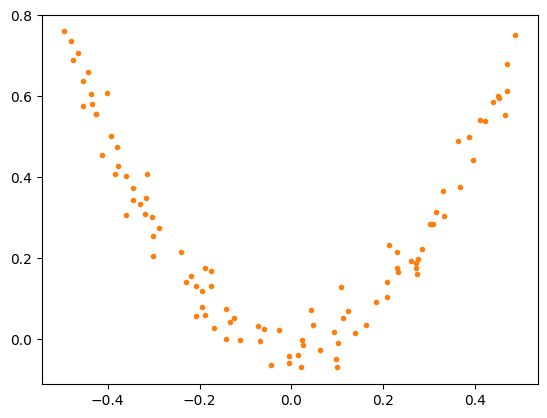

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X, y , '.', color='C1')

plt.show()

### 학습과정 데모

In [ ]:
# 개별학습기 로드[+]
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#### 0번 학습기

- 위 식에서 다음 식에 해당하는 학습기로 매우 약한 학습기를 학습 시킨다.

$$
F_0(x) = \underset{\gamma}{\text{argmin}} \sum_{i=1}^n L(y_i, \gamma)
$$

- 위 학습기는 상수를 출력하는 학습기로 주로 평균을 출력하는 더미 학습기를 사용




In [ ]:
# 아주 약한 학습기를 한번 학습시킨다.[+]

from sklearn.dummy import DummyRegressor

h0 = DummyRegressor(strategy="mean").fit(X, y) # y(타겟)값의 평균으로 예측하는 더미 학습기


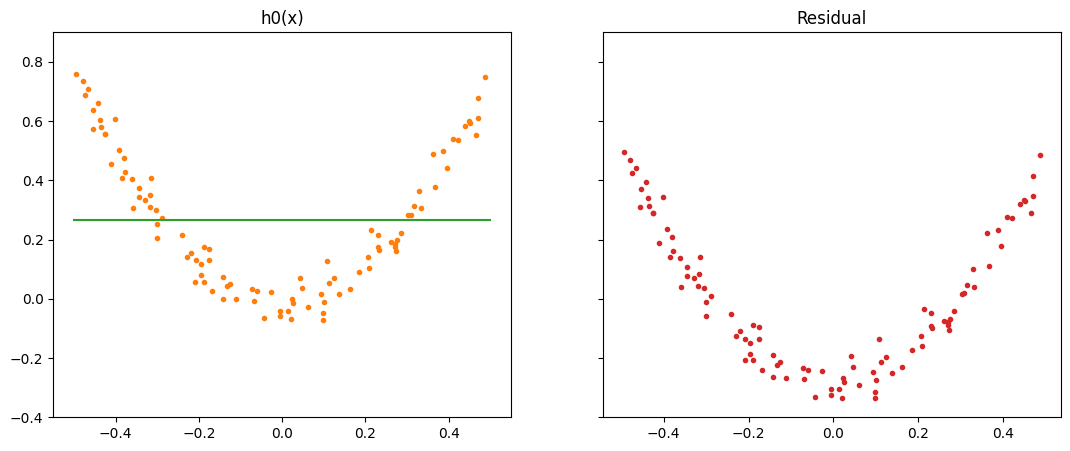

In [ ]:
# 예측하고 잔차를 구한다.[+]
y_h0 = h0.predict(X)
r0 = y - y_h0 # 잔차 (아래 그래프의 선을 기준, 점들의 차이)


# 결과를 그림으로 확인
x = np.linspace(-0.5, 0.5, 1000)

fig, ax = plt.subplots(figsize=(13,5), nrows=1, ncols=2, sharey=True)
ax[0].set_ylim([-0.4, 0.9])
ax[0].plot(X, y , '.', color='C1')
ax[0].plot(x, h0.predict(x.reshape(-1,1)), color='C2')
ax[0].set_title('h0(x)')

ax[1].plot(X, r0, '.', color='C3')
ax[1].set_title('Residual')

plt.show()

In [ ]:
# 0번 학습기가 만들어낸 손실[+]
np.sum((y - y_h0)**2) / y.shape[0]

0.055700095626935904

#### 1번 학습기

In [ ]:
# 두번째 학습기를 학습한다.
# 아주 약한 학습기를 한번 학습시킨다.
h1 = DecisionTreeRegressor(max_depth=2).fit(X, r0) # 타겟을 잔차(r0)로 학습

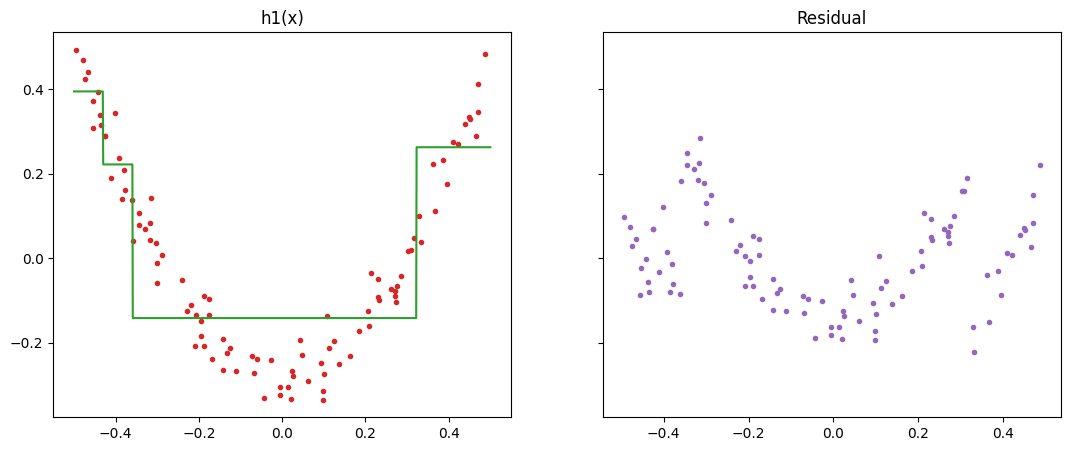

In [ ]:
# 예측하고 잔차를 구한다.
y_h1 = h1.predict(X)
r1 = r0 - y_h1

# 결과를 그림으로 확인
x = np.linspace(-0.5, 0.5, 1000)

fig, ax = plt.subplots(figsize=(13,5), nrows=1, ncols=2, sharey=True)

ax[0].plot(X, r0 , '.', color='C3')
ax[0].plot(x, h1.predict(x.reshape(-1,1)), color='C2')
ax[0].set_title('h1(x)')

ax[1].plot(X, r1, '.', color='C4')
ax[1].set_title('Residual')

plt.show()

In [ ]:
# 0번+1번 학습기가 만들어낸 손실[+]
np.sum((y - (y_h0+y_h1))**2) / y.shape[0]

0.01330303348473463

#### 2번 학습기

In [ ]:
# 세번째 학습기를 학습한다.
# 아주 약한 학습기를 한번 학습시킨다.
h2 = DecisionTreeRegressor(max_depth=2).fit(X, r1)

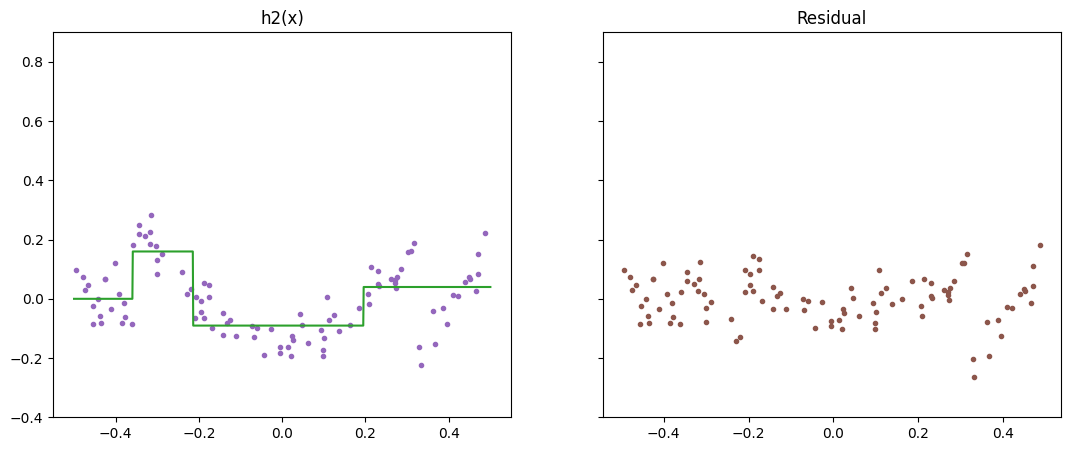

In [ ]:
# 예측하고 잔차를 구한다.
y_h2 = h2.predict(X)
r2 = r1 - y_h2

# 결과를 그림으로 확인
x = np.linspace(-0.5, 0.5, 1000)

fig, ax = plt.subplots(figsize=(13,5), nrows=1, ncols=2, sharey=True)
ax[0].set_ylim([-0.4, 0.9])
ax[0].plot(X, r1 , '.', color='C4')
ax[0].plot(x, h2.predict(x.reshape(-1,1)), color='C2')
ax[0].set_title('h2(x)')

ax[1].plot(X, r2, '.', color='C5')
ax[1].set_title('Residual')

plt.show()

In [ ]:
# 0번+1번+2번 학습기가 만들어낸 손실[+]
np.sum((y - (y_h0+y_h1+y_h2))**2) / y.shape[0]

0.006143093718386409

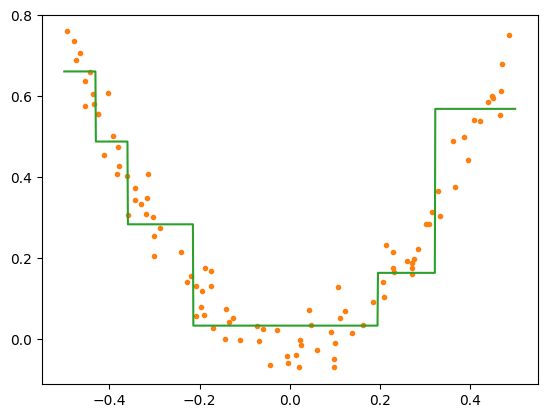

In [ ]:
# 예측기 세개를 다 더하기[+]
pred = h0.predict(x.reshape(-1,1)) + h1.predict(x.reshape(-1,1)) + h2.predict(x.reshape(-1,1))

fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X, y , '.', color='C1')
ax.plot(x, pred, color='C2')

plt.show()

### 학습

In [ ]:
# 그래디언트부스팅 직접 만들기[+]

# 위 알고리즘에서처럼 상수로 첫번째 예측기를 정한다,  예측기 인덱스 m=0
# 보통 평균으로
H = [ y.mean() ] # 평균으로 예측하는 예측기

M = 2 # 예측기 수,-> 55
lr = 1.0 # 학습률 또는 스탭 사이즈, ->0.1

# 모든 포인트에 대한 0번째 학습기의 예측을 구함, 그냥 H[0]로 모든 포인트에서 예측
Fm_1 = np.ones(X.shape[0])*H[0] # 1로 채워진 array * 평균예측값 H = 평균

# 학습
for m in range(1, M+1): # 최초 더미 예측기 제외 M개 예측기
    # 잔차 구하기[+]
    r_im = y - Fm_1

    # 구해진 잔차 r_im에 대해서 학습기 hm을 학습하여 H에 추가[+]
    H.append(
        DecisionTreeRegressor(max_depth=2, random_state=42).fit(X, r_im)
    )

    # 아래 KNN으로 해도 상관없음
    # H.append(
    #     KNeighborsRegressor(n_neighbors=10).fit(X, r_im)
    # )

    # F 업데이트: F_{m-1} = F_{m-1} + lr * H_m(x)
    Fm_1 += lr*H[-1].predict(X)
    # 만약 lr(learning rate)가 0.5인경우 : 학습기위 예측값을 50%만 반영한다는 뜻.




In [ ]:
# 예측하기[+]
x = np.linspace(-0.5, 0.5, 1000)

# 전체 학습기를 돌면서
for i in range(len(H)):
    if i == 0:
        # 첫번째 학습기는 상수만 출력하므로 모두 같은 값으로 예측
        pred = np.ones_like(x)*H[i]
    else:
        # 그 다음부터 H[i]를 사용하여 x에 대해서 예측한 값을 사용
        pred += lr*H[i].predict(x.reshape(-1,1))

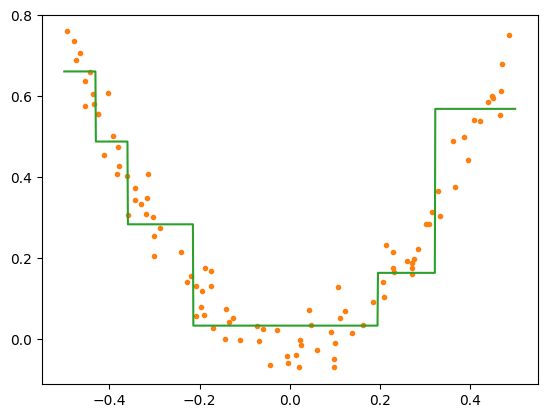

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X, y , '.', color='C1')
ax.plot(x, pred, color='C2')

plt.show()

#### sklearn 이용

-  개별 학습기는 무조건 트리 기반으로 구현

In [ ]:
# 모델 로드[+]
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# 모델 생성과 fit[+]
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=M, learning_rate=lr)
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=2)

In [ ]:
# 예측[+]
pred_sk = gbrt.predict(x.reshape(-1,1))

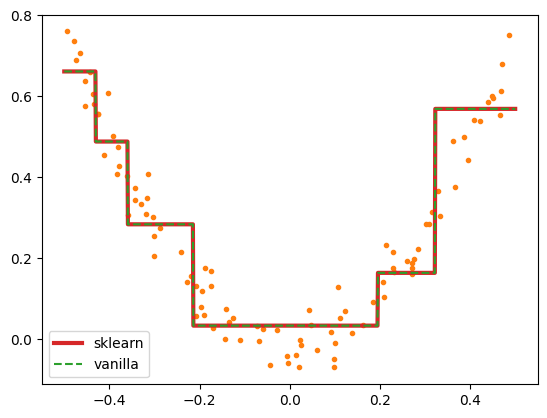

In [ ]:
# 그림 확인
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X, y , '.', color='C1')
ax.plot(x, pred_sk, color='C3', lw=3, label='sklearn')
ax.plot(x, pred, '--', color='C2', label='vanilla')

ax.legend()
plt.show()

- sklearn과 이전에 했던 예측이 동일함을 확인

## [참고] XGBoost

- XGBoost는 "Extreme Gradient Boosting"의 약자로서, 그래디언트 부스팅 머신을 확장하고 최적화하여 성능을 향상시킨 알고리즘
    
- 개선된 성능과 빠른 처리 속도

In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBRegressor(max_depth=2, n_estimators=M, learning_rate=lr)

In [ ]:
model_xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 예측[+]
pred_xgb = model_xgb.predict(x.reshape(-1,1))

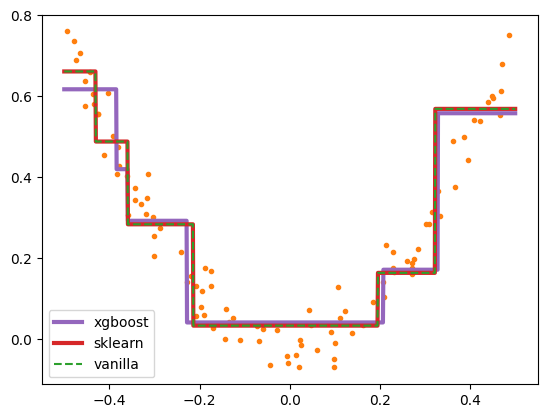

In [ ]:
# 그림 확인
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X, y , '.', color='C1')
ax.plot(x, pred_xgb, color='C4', lw=3, label='xgboost')
ax.plot(x, pred_sk, color='C3', lw=3, label='sklearn')
ax.plot(x, pred, '--', color='C2', label='vanilla')

ax.legend()
plt.show()

## 실습과제: 실제 데이터에 적용[*]

### 분류: 유방암 데이터

- 아래 로드된 유방암 데이터를 앙상블 메소드 배깅, 랜덤포레스트, 그래디언트 부스팅을 사용하여 모델링하세요.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

#### 배깅

In [ ]:
# 모델 로딩[*]
from sklearn.ensemble import BaggingClassifier

# n_estimators 고정
N = 5

# 모델 생성과 피팅
bagging_tree = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth = 5),
                                 n_estimators = N,
                                 random_state =1).fit(X_train, y_train)


In [ ]:
print(f"학습 세트 정확도: {bagging_tree.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도: {bagging_tree.score(X_test, y_test):.3f}")

학습 세트 정확도: 0.995
테스트 세트 정확도: 0.937


#### 랜덤 포레스트

In [ ]:
# 모델 로딩
from sklearn.ensemble import RandomForestClassifier

# 모델 생성과 피팅
forest = RandomForestClassifier(n_estimators = N, random_state = 2).fit(X_train, y_train)

In [ ]:
print(f"학습 세트 정확도: {forest.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도: {forest.score(X_test, y_test):.3f}")

학습 세트 정확도: 0.991
테스트 세트 정확도: 0.923


#### 그래디언트 부스팅

In [ ]:
# 모델 로딩[*]
from sklearn.ensemble import GradientBoostingClassifier

d = 3
N = 100
lr = 0.1

# 모델 생성과 fit[*]
gbct = GradientBoostingRegressor(max_depth = d, n_estimators = N, learning_rate = lr).fit(X_train, y_train)

In [ ]:
# 성능 확인[*]
print(f"학습 세트 정확도: {gbct.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도: {gbct.score(X_test, y_test):.3f}")

학습 세트 정확도: 0.998
테스트 세트 정확도: 0.773


### 회귀: 가상 곡선

- 회귀 데이터에 대해서 앙상블 메소드를 실습합니다.


- 아래 탬플릿은 기본적으로 그래디언트 부스팅으로 작성되어 있지만 다른 알고리즘으로 바꿔서 연습하는 것도 좋은 학습 방법입니다.

- 셀 주석대로 train, test 데이터에 대해 각각 회귀를 수행하여 결과를 비교하고 하이퍼 파리미터를 조정하면서 결과가 어떻게 변하는지 확인하세요.

In [ ]:
# 데이터 로드
D = np.load('/content/data_1d.npz')

x = D['x']
t = D['t']
X_train_d = D['X_train']
y_train_d = D['Y_train']
X_test_d = D['X_test']
y_test_d = D['Y_test']


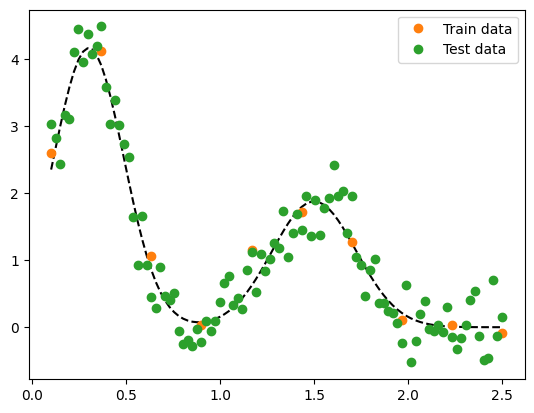

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(x, t, '--', color='k')
ax.plot(X_train_d, y_train_d, 'o', color='C1', label='Train data')
ax.plot(X_test_d, y_test_d, 'o', color='C2', label='Test data')

ax.legend()
ax.grid(False)

plt.show()

In [ ]:
# 학습세트에 대해서 그래디언트부스트 모델 생성과 fit[*]
gbrt_train = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=50,
    learning_rate=0.1
)

gbrt_train.fit(X_train_d.reshape(-1,1), y_train_d)

GradientBoostingRegressor(max_depth=2, n_estimators=50)

In [ ]:
# 테스트 세트에 대해서 그래디언트부스트 모델 생성과 fit[*]
# 러닝레이트와 예측기 수를 변경하면서
# 아래 그래프를 확인하면서 두 하이퍼 파라미터의 효과를 확인
gbrt_test = GradientBoostingRegressor(
    max_depth=3,
    n_estimators=30,
    learning_rate=0.1
)

gbrt_test.fit(X_test_d.reshape(-1,1), y_test_d)

GradientBoostingRegressor(n_estimators=30)

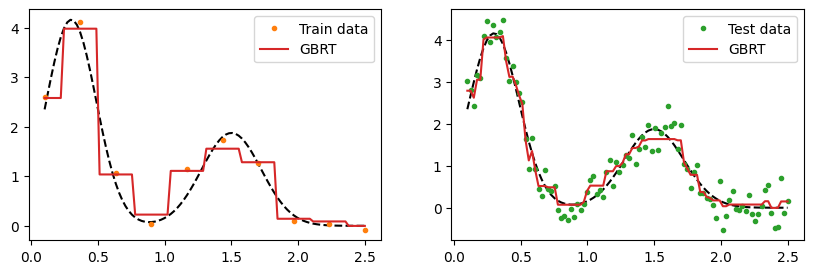

In [ ]:
# 그림으로 확인[*]
# 위 코드의 max_depth, n_estimators, learning_rate를 변화시키며 아래 그래프 변화 확인
fig, ax = plt.subplots(figsize=(10,3), nrows=1, ncols=2, dpi=100)

ax[0].plot(x, t, '--', color='k')
ax[0].plot(X_train_d, y_train_d, '.', color='C1', label='Train data')
ax[0].plot( x, gbrt_train.predict(x.reshape(-1,1)), color='C3', label='GBRT' )
ax[0].legend()


ax[1].plot(x, t, '--', color='k')
ax[1].plot(X_test_d, y_test_d, '.', color='C2', label='Test data')
ax[1].plot( x, gbrt_test.predict(x.reshape(-1,1)), color='C3', label='GBRT' )
ax[1].legend()


plt.show()